## Social Science Workshop
This workshop is offered by UCI libraries and uses the Carpentries.org material. I worked through the Carpentries curricula (https://datacarpentry.org/lessons/#social-science-curriculum)

### Module 1: Data Wrangling
*Spreadheets* are good for data entry, not good for creating tables, charts, or graphs.
* Not easily reproducible. 

**Tips**  
* Create separate tabs for cleaned / messy / analyzed data. 
* DON'T modify the existing dataset
* Make notes of the changes you made to the data at each step   
    * This can be in a new tab (recommended), so the data & notes stay together
    * Can also be in a separate document
* Variables go in columns (i.e., the thing you're measuring like weight or temperature)
* One observation per row
* Don't combine multiple pieces of information into one cell
* Leave the raw data raw!  
    * DO NOT MODIFY RAW DATA
* Export data as a CSV so it's universally accessible.
* Each variable should have its own column, each observation should have its own row, and each cell should only contain a single value.

**Metadata**
* Data about data
* Should not be included in the data file, because it's not part of the data set collected.
* Store it in a plain text file in the same directory as the data set. 
* Codebooks are a type of metadata.  
    * Including question prompts, variable values, and variable descriptions
* A folder-level README file gives details about what is included in the dataset directory. 

*Resource:*  
[Data Documentation Initiative](https://www.ddialliance.org/)

#### Formatting Problems
Some things to avoid:
* Using multiple tables in one sheet.
* Using multiple tabs (e.g., a tab for observations on different days).
    * Contributes to inconsistency
    * Creates an extra step because you eventually have to combine the data to analyze it.
    * New tabs are fine if you're cleaning the data or making notes.
* Not filling in zeros
    * Don't leave blanks.
    * Computers view empty cells as "not recorded" rather than as 0. 
* Using problematic null values (e.g., -999) to represent missing data. Avoid.
    * Blank, NA, na are all good options.
    * 0, -999, 999, N/A, NULL, None, No Data, Missing, -, +, . are all things to avoid. 
* Using formatting to convey information
    * Highlighting cells that should be excluded from analysis or leaving blank rows is bad.
* Pretty formatting.
    * merged cells, colors, bold, etc. all bad and unreadable by computers.
* Adding comments to cells
    * e.g., yes (in summer). The (in summer) should be converted to its own column.
* Entering more than one piece of information in the cell. 
* Problematic field names
    * Underscores are a good alternative to spaces. 
    * Use CamelCase
* Using special characters
    * this includes line breaks and em dashes 

#### Dates as Data
* Avoid ambiguity by separating dates into three columns
    * Avoids problems with 7 being both a month and day. (e.g., is 7/1/2022 July 1st or January 7th?)
    * Month
    * Date
    * Year
* Excel stores dates as numbers, so July 2, 2014 is stored as 41822 (the number of days since December 31, 1899)
    * On Mac, it uses the 1904 date system so the serial number 41822 is off by about 4 years.


In [3]:
## Note: This is doable in Excel by using the =YEAR, =Month, =Day formulas. 
## Load packages and data
suppressWarnings({library(stringr)
library(readxl)
library(lubridate)
library(tidyverse)})

safi_dates <- read_excel("./Data/SAFI_dates.xlsx")

## separate dates
dates <- read.table(text = safi_dates$interview_date, sep ="/")

colnames(dates) <- c("day", "month", "year")

safi_dates <- safi_dates[,c(2:7)]

dates <- cbind(dates, safi_dates)
View(dates)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr   1.1.2     v readr   2.1.4
v forcats 1.0.0     v tibble  3.2.1
v ggplot2 3.4.2     v tidyr   1.3.0
v purrr   1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


day,month,year,years_farm,parents_liv,no_membrs,roof_type,wall_type,floor_type
<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
17,11,2016,11,no,3,grass,muddaub,earth
17,11,2016,2,yes,7,grass,muddaub,earth
16,11,2016,16,yes,8,grass,burntbricks,earth
16,12,2016,22,no,12,mabatisloping,burntbricks,cement
21,11,2016,6,yes,6,grass,sunbricks,earth
21,11,2016,53,yes,19,mabatipitched,muddaub,earth
21,11,2016,20,yes,8,grass,muddaub,cement
17,11,2016,18,no,8,mabatisloping,burntbricks,cement
17,11,2016,21,yes,10,mabatisloping,burntbricks,cement


#### Quality Assurance
Data validation is used to ensure cells get the right kind of information (e.g., age can't be less than 0 or greater than 120)
* Excel will give a warning by placing an orange triangle in the cell when it doesn't pass validation. 

**validating using excel**  
using the safi clean dataset
* data tab > validate data
    * no_membrs should only have positive integers with a maximum of 30 (reject negative numbers or decimal/floating points)

#### Exporting Data
* Don't save your file as an .xls or xlsx format. 
* Save in either .tsv or .csv (tab and comma separate values, respectively).

## Module 2: Open Refine
[Open Refine](https://openrefine.org/) is an open source tool that allows you to clean and refine your data while ensuring that all of the steps are reproducible.
* Create project > Data from computer > SAFI_openrefine.csv
* *Facet* groups like values together by column and allows you to edit them
    * Text facet groups identical text values and lists how many instances of it there are. 
* Can also export everything you've done as a .json file so it can be imported and applied to different datasets. 
* Export as Open Refine tar.gz, tsv, or csv. 

## Data Manipulation & Visualization in R
Good folder structure:
* data/ for raw & intermediate data sets
* data_output/ for modified data
* documents/ for outlines, drafts, etc
* fig_output/ for graphics generated by scripts
* scripts/ for RScripts for different analyses or plotting

Working Directory:
* can use getwd() to get the current working directory. R will look in this directory for all of the code and data. 
    * use relative paths to and from the working directory in your scripts. 

Working with Data:
R stores data as data frames
* Columns are vectors of the same length
    * Must contain a single type of data (e.g., character, integer, etc)
* when using read.csv R will coerce some column names into different formats (e.g., interview data becomes interview.date)
* R will load the data as a tibble if it's read using read_csv(). Tibbles are cleaner.

Package Conflicts:
Sometimes different packages conflict.
* R will use the most recently installed function (from whatever package was most recently installed)
* To find package conflicts: conflicted::conflict_scout()
* To set our preferred function: conflict_prefer("function", "package_preferred")

Here!  
* creates paths relative to the top level directory. 

Factors:
* R's special data class. 
* Useful for categorical data. 
    * Stored as integers which can be ordinal or nominal
    * Create a structured relation between different values (e.g., days of the week)
    * Can only contain a pre-defined set of values (levels)
    * Will be stored alphabetically.
    * Use levels() to view levels
    * Can specify the levels using factor(variable, levels =c("level1", "level2"))
    * Use ordered = TRUE to preserve level order (e.g., low, medium, high)
    * Can change factors using fct_recode(). 
        * e.g., fct_recode(variable, brick = "cement")
* Can covert between data types
    * as.numeric()
    * as.character()
* User plot() to get see the number of observations in each level

Formatting Dates:
* Save each component of the date as a separate variable. 
* Can use the libridate package which is part of the tidyverse.
* Convert dates that are stored as characters to date format using as_date()
    * the format argument tells the order in which to parse the dates (e.g., %m/%d/%Y)


Warning message:
"package 'here' was built under R version 4.1.3"


here() starts at C:/Users/lizmo/Documents/GitHub/workshops



[1] "data.frame"

[1] NULL yes  NULL NULL NULL NULL no   yes  no   no   NULL yes  no   NULL yes 
 [16] NULL NULL NULL NULL NULL no   NULL NULL no   no   no   NULL no   yes  NULL
 [31] NULL yes  no   yes  yes  yes  NULL yes  NULL yes  NULL no   no   NULL no  
 [46] no   yes  NULL NULL yes  NULL no   yes  no   NULL yes  no   no   NULL no  
 [61] yes  NULL NULL NULL no   yes  no   no   no   no   yes  NULL no   yes  NULL
 [76] NULL yes  no   no   yes  no   no   yes  no   yes  no   no   NULL yes  yes 
 [91] yes  yes  yes  no   no   no   no   yes  no   no   yes  yes  no   NULL no  
[106] no   NULL no   no   NULL no   NULL NULL no   no   no   no   yes  no   no  
[121] no   no   no   no   no   no   no   no   no   yes  NULL
Levels: no NULL yes

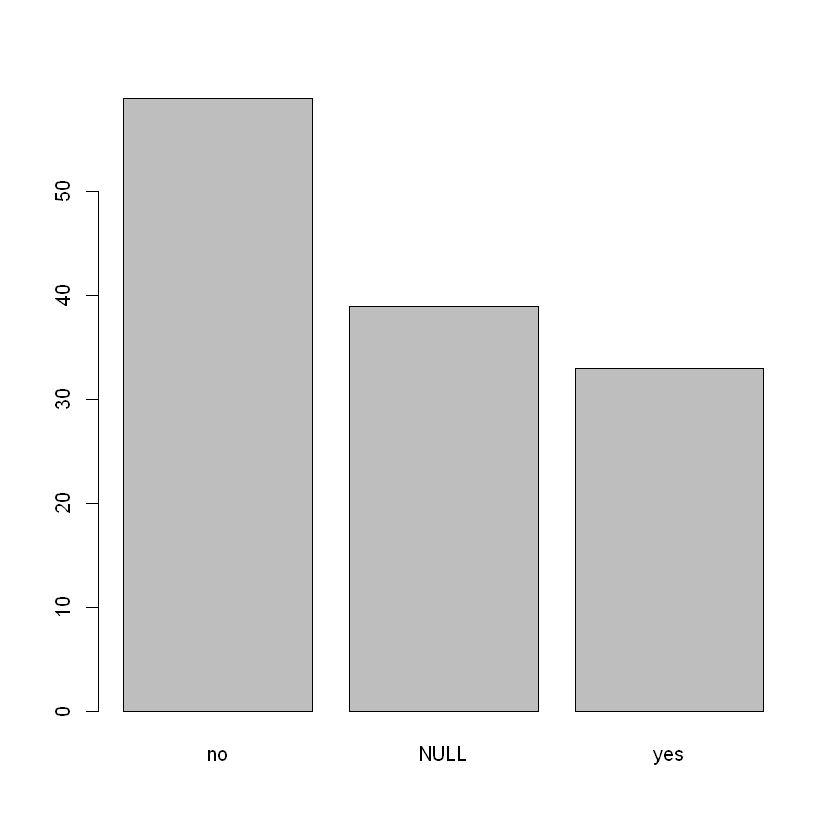

In [4]:
## Load Packages and Data
library(tidyverse)
library(here)

interviews <- read.csv("../social science/Data/SAFI_clean.csv")

# View(interviews)
# head(interviews)
class(interviews)

# Subset row 100
interviews_100 <- interviews[100,]

# compare last row using subset and tail
interviews_tail <- tail(interviews)
n_rows <- nrow(interviews)
interviews_last <- interviews[n_rows,]

# subset middle row
interviews_middle <- interviews[median(1:n_rows), ]

# basic plotting
memb_assoc <- interviews$memb_assoc
memb_assoc[is.na(memb_assoc)] <- "undetermined"
memb_assoc <- as.factor(memb_assoc)
plot(memb_assoc)

memb_assoc

# expand date into three columns
library(lubridate)
dates <- interviews$interview_date
interviews$day <- day(dates)
interviews$month <- month(dates)
interviews$year <- year(dates)

## Data Wrangling with dplyr
* dplyr is a data wrangling package included in the tidyverse. 
* select() lets you choose columns by name.
* Can use filter() to filter out some data.
* Use pipes ( %>% ) to chain arguments.
* group_by() collapses each group into a single-row summary.
    * arguments are the column names that contain categorical variables.
* ungroup() will ungroup the tibble

In [5]:
## load data
library(readr)
library(tidyverse)
interviews <- read.csv("../social science/Data/SAFI_clean.csv")

## subset and select some of the data
some_interviews <- interviews  %>% 
    filter(memb_assoc == "yes")  %>% 
    select(affect_conflicts, liv_count, no_meals)

## remove observation if they didn't answer the question
# interviews  %>% 
#     filter(!is.na(memb_assoc))  %>% 
#     mutate(people_per_room = no_membrs / rooms)

## exercise
new_interviews <- interviews  %>% 
    mutate(total_meals = no_membrs*no_meals)  %>% 
    filter(total_meals > 20)  %>% 
    select(village)

## Summarize function
interviews  %>% 
    group_by(village)  %>% 
    summarize(mean_no_membrs = mean(no_membrs))

## group by multiple columns
interviews  %>% 
    group_by(village, memb_assoc)  %>% 
    summarize(mean_no_membrs = mean(no_membrs))  %>% 
    ungroup()

## there are more steps here which I have skipped

## exercises
meals <- interviews  %>% 
    count(no_meals)

## min, max, number of observations
data.frame(colnames(interviews))
min_max <- interviews  %>% 
    group_by(village)  %>% 
    summarize(
        min(no_membrs),
        max(no_membrs),
        mean(no_membrs),
        n = n())

## largest household interviewed per month.
dates <- interviews$interview_date
interviews$day <- day(dates)
interviews$month <- month(dates)
interviews$year <- year(dates)

interviews  %>% 
    group_by(month)  %>% 
    summarize(max(no_membrs))

village,mean_no_membrs
<chr>,<dbl>
Chirodzo,7.076923
God,6.860465
Ruaca,7.571429


`summarise()` has grouped output by 'village'. You can override using the
`.groups` argument.


village,memb_assoc,mean_no_membrs
<chr>,<chr>,<dbl>
Chirodzo,NULL,5.083333
Chirodzo,no,8.062500
Chirodzo,yes,7.818182
God,NULL,6.000000
God,no,7.133333
God,yes,8.000000
Ruaca,NULL,6.222222
Ruaca,no,7.178571
Ruaca,yes,9.500000


colnames.interviews.
<chr>
key_ID
village
interview_date
no_membrs
years_liv
respondent_wall_type
rooms
memb_assoc
affect_conflicts


month,max(no_membrs)
<dbl>,<int>
4,17
5,15
6,15
11,19
12,12


## Data Wrangling with tidyr
* Three rules that define a "tidy' data set
    * Each variable has its own column
    * Each observation has its own row
    * Each value has its own cell
* long format = one row per observation
* wide format = columns can represent different levels/values of a variable.
* R expects the data to be in long form.
* Pivot_wider() uses three arguments
    * The data
    * The names_from column whose values will become new column names
    * the values_from column whose values will fill the new column variables 
    * the values_fill column is the values that will fill the new column variables 
* pivot_longer() uses four arguments:
    * The data
    * cols are the names of the columns we use to fill the new values variable
    * names_to is the column variable you want to create from the cols provided
    * values_to is the variable you want to create and fill with values associated with the cols provided.
*  
    

In [10]:
## load data
interviews <- read.csv("../social science/Data/SAFI_clean.csv")

## create dummy column to hold true than use it to populate the wall type 
interviews_wide <- interviews  %>% 
    mutate(wall_type_logical = TRUE)  %>% 
    pivot_wider(names_from = respondent_wall_type, 
                values_from = wall_type_logical,
                values_fill = list(wall_type_logical = FALSE))

## pivoting longer
interviews_long <- interviews_wide  %>% 
    pivot_longer(cols = c("muddaub", "cement", "sunbricks", "burntbricks"),
                names_to = "respondent_wall_type",
                values_to = "wall_type_logical")  %>% 
                filter(wall_type_logical)  %>% 
                select(-wall_type_logical)

interviews_items_owned <- interviews  %>% 
    separate_rows(items_owned, sep=";")  %>% # separate the values of items_owned by semicolon
    replace_na(list(items_owned = "no_listed_items"))  %>% # replace NA with useful information
    mutate(items_owned_logical = TRUE)  %>%  # 
        pivot_wider(names_from = items_owned,
        values_from = items_owned_logical,
        values_fill = list(items_owned_logical = FALSE))

nrow(interviews_items_owned)

[1] 131